## Double click to edit and enter your team data

Student 1 Name:AHMED SAID 

Student 1 ID:55-18839

---

Student 2 Name:AMR SALAH

Student 2 ID:55-22784

---

Student 3 Name:FARIDA AHMED

Student 3 ID:55-18371

---

Student 4 Name:AYA MOHAMED

Student 4 ID:55-12084


##**Imports**
Don't remove any import. However, you may add to them if you wish to


In [134]:
import cv2 # Opencv library is used to manipulate images.
import matplotlib.pyplot as plt # matplotlib used for plotting (showing) images.
import numpy as np # numpy is used to treat images as 2D arrays.

## Helper Functions


In [136]:
def get_size(image):
    return image.shape


In [137]:
def get_pixel_value(image, row, col):
    return image[row, col]


Reading (opening an image using opencv) and showing it using matplotlib.

Run the cells below to open and show the image.


In [138]:
# Global variable for the gray-scale image
gray_image = cv2.imread('./house.tif', cv2.IMREAD_GRAYSCALE)
gray_image = cv2.resize(gray_image, (256 ,156))


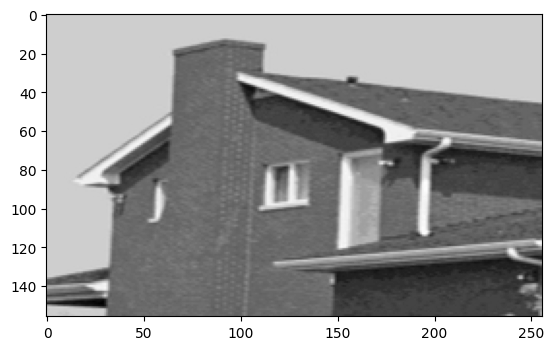

In [139]:
# printing the number of rows and columns in the gray-scale image.
plt.imshow(gray_image, 'gray') # showing the image
plt.show()

# Image Encoding


## Task 1

Convert gray-scale image to binary using a threshold


In [140]:
binary_image = np.zeros((gray_image.shape[0], gray_image.shape[1]), dtype='float64')

def img_to_bin(gray_img:np.array):
  # start of your code here
  return  (gray_img>=128).astype(int)
  # end of your code here


In [141]:
# Run this cell to test your function.
# (you may change the row number to test with different row indicies)
binary_image = img_to_bin(gray_image)

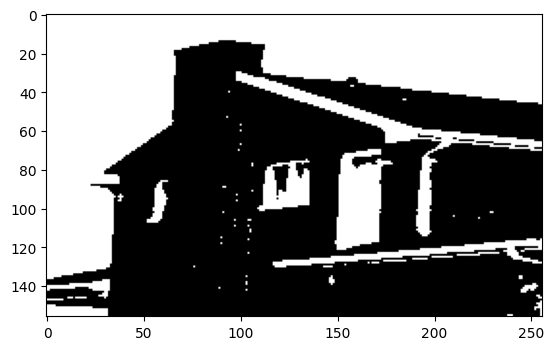

In [142]:
# Run this cell to show the result of your function.
plt.imshow(binary_image, 'gray')
plt.show()

## Task 2


In [143]:
# Global Variables
CODE = []

In [144]:
# Get the indices of ones in a certain row number.

def get_indicies_of_starting_ones(twoD_array:np.array, row_index:int):
    # start your code here
    res=[]
    target=twoD_array[row_index]
    i=0
    while i<len(target):
        if target[i] :
            res.append(i)
            while  i<len(target) and target[i]:
                i+=1
        i+=1
    return res
    # end your code here

In [145]:
# Run this cell to test your function
# (you may change the row number to test with different row indicies)

indicies = get_indicies_of_starting_ones(binary_image, 100)
indicies


[0, 55, 109, 151, 192]

## Task 3


In [146]:
# Get the length of runs in a certain row number.

def get_length_of_runs(twoD_array, row_index):
    res=[]
    target=twoD_array[row_index]
    indices=get_indicies_of_starting_ones(twoD_array,row_index)
    if len(indices):
        prev=indices[0]
        for index in indices[1:]:
            res.append(np.count_nonzero(target[prev:index-1]))
            prev=index
        res.append(np.count_nonzero(target[prev:]))


    return res
    # end your code here

In [147]:
# Run this cell to test your function
# (you may change the row number to test with different row indicies)
lengths_of_ones = get_length_of_runs(np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1]]), 1)
lengths_of_ones

[12, 3]

## Task 4


In [148]:
# Encode the image as a long string separated by commas.
# The encoding format for a single run is: 'row number_(starting position of the continuous 1s) × 1000 + (number of continuous 1s)'
def encoding_image(twoD_array):
    # start your code here
    res=''
    for index,_ in enumerate(twoD_array):
        starting_ones=get_indicies_of_starting_ones(twoD_array,index)
        number_consectutive_ones=get_length_of_runs(twoD_array,index)
        for i in range(len(starting_ones)):
            res+=f'{index}_{starting_ones[i]*1000+number_consectutive_ones[i]},'

    return res.removesuffix(',')
    # end your code here

In [149]:
# Run this cell to test your function
CODE = encoding_image(binary_image)
CODE

'0_256,1_256,2_256,3_256,4_256,5_256,6_256,7_256,8_256,9_256,10_256,11_256,12_256,13_256,14_89,14_98158,15_84,15_106150,16_79,16_113143,17_74,17_113143,18_70,18_113143,19_66,19_112144,20_66,20_112144,21_66,21_112144,22_67,22_112144,23_67,23_112144,24_67,24_111145,25_67,25_111145,26_67,26_111145,27_67,27_111145,28_67,28_112144,29_67,29_112144,30_67,30_98003,30_112144,31_67,31_98006,31_116140,32_66,32_98009,32_124132,33_66,33_98015,33_133023,33_160096,34_66,34_98017,34_147008,34_161095,35_66,35_101018,35_161095,36_66,36_104018,36_165091,37_66,37_107018,37_157002,37_173083,38_66,38_110018,38_183073,39_66,39_113018,39_189067,40_66,40_94001,40_116018,40_199057,41_66,41_119018,41_208048,42_66,42_122018,42_217039,43_66,43_125019,43_225031,44_66,44_128019,44_184002,44_234022,45_66,45_131019,45_243013,46_66,46_135018,46_254002,47_66,47_138018,48_66,48_141018,49_66,49_144018,50_65,50_147018,51_65,51_150018,52_65,52_153018,53_65,53_93001,53_156018,54_65,54_159018,55_66,55_162018,56_65,56_165018,5

# Image Decoding


## Task 1


In [150]:
# Get the substrings of the string that have the same row number
def split_string(CODE:str, row_index:int)->list:
    return [i for i in CODE.split(',') if len(i) and int(i.split('_')[0])==row_index]
    # end your code here


In [151]:
# Run this cell to test your function
# (you may change the row number to test with different row indicies)
substrings = split_string(CODE, 1)
substrings

['1_256']

## Task 2


In [152]:
# To decode a single row

def decode_row(width, height, CODE, row_index)->list:
    # start your code here
    target_strings=split_string(CODE,row_index)
    res=[0]*width

    string:str
    for string in target_strings:
        after_under=int(string.split('_')[1])
        one_start=after_under//1000
        freq=after_under%1000
        res[one_start:one_start+freq]=[1]*freq
    return res
    # end your code here


In [153]:
# Run this cell to test your function
# (you may change the row number to test with different row indicies)
decoded_row = decode_row(gray_image.shape[1], gray_image.shape[0], CODE, 1)
decoded_row

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


## Task 3


In [154]:
# constructing the image back

def construct_image(width,height,encoding:str):
    # start your code here
    res=[]
    zipped=[ {key:[i for i in encoding.split(',') if int(i.split('_')[0])==key ]} for key in range(height) ]
    for pair in zipped:
        encodings:list
        for key,encodings in pair.items():
            res.append(decode_row(width,height,",".join(encodings),key))

    return res
    # end your code here

In [155]:
# Run this cell to test your function
reconstructed_image = construct_image(gray_image.shape[1], gray_image.shape[0],CODE)


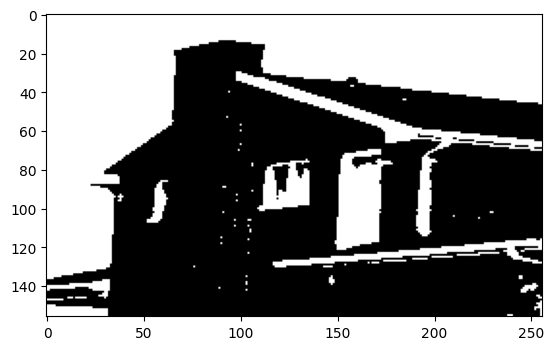

In [156]:
# Run this cell to show your reconstructed image
plt.imshow(reconstructed_image, 'gray')
plt.show()